# Notebook 10: The Bootstrap 
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [25]:
import numpy as np 
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

import math

### Exercise 1 - Bootstrapped Confidence Intervals for the Mean 
*** 

In this exercise you will experiment with empirical bootstrap techniques to compute confidence intervals the mean of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Write down the expected value, variance, and standard deviation of $X \sim Exp(5)$.  You can look them up on [Wiki](https://en.wikipedia.org/wiki/Exponential_distribution) if you need to. 

**Solution**: We have 

$$
E[X] = \frac{1}{\lambda} = \frac{1}{5} = 0.2, \quad \textrm{Var}(X) = \frac{1}{\lambda^2} = \frac{1}{25} = 0.04, \quad \textrm{SD}(X) = \frac{1}{\lambda} = \frac{1}{5} = 0.2  
$$

**Part B**: The variable $\texttt{sample1}$ below consists of $500$ samples from $Exp(5)$.  Complete the function bootstrapped_mean below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample1}$ and compute a bootstrapped confidence interval for the mean at the 95% confidence level.  

In [26]:
sample1 = np.random.exponential(1/5, size=450)

In [30]:
def bootstrapped_mean(sample,alpha, num_boots=5000):
    
    list_of_means = []
    
    for i in range(0,num_boots):
        resample = np.random.choice(sample,size = len(sample))
        mean_resample = np.mean(resample)
        list_of_means.append(mean_resample)
    L = np.percentile(list_of_means,alpha/2*100)
    U = np.percentile(list_of_means,100-alpha/2*100)
    
    CI = [L, U]
    return CI 
    
bootstrapped_mean(sample1,alpha=.05)

[0.1902064011589954, 0.2267796268973684]

**Part C**: Modify the code you wrote in **Part B** to also plot a histogram of the bootstrapped sample means along with some graphical representation of the calculated confidence interval. 

[0.19084652277857267, 0.2279498786881915]

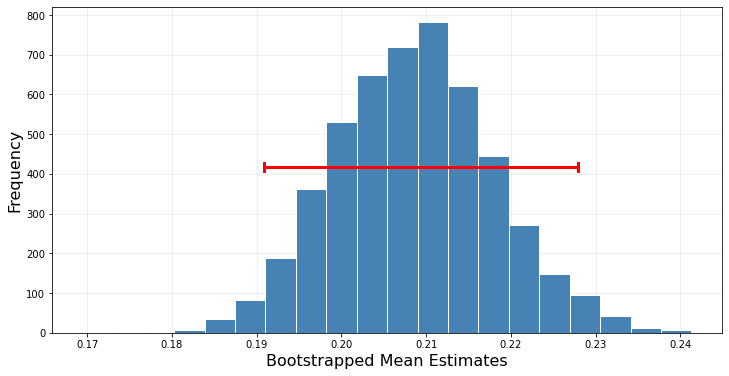

In [31]:
def bootstrapped_mean(sample, num_boots=5000):
    
    list_of_means = []
    
    for i in range(0,num_boots):
        resample = np.random.choice(sample,size = len(sample))
        mean_resample = np.mean(resample)
        list_of_means.append(mean_resample)
    L = np.percentile(list_of_means,2.5)
    U = np.percentile(list_of_means,97.5)
    
    CI = [L, U]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_means).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    return CI 
bootstrapped_mean(sample1)

**Part D**: Use the sample mean of $\texttt{sample1}$ and the known standard deviation of the distribution to compute a traditional 95% confidence interval for the mean of the distribution.  Compare your $\color{red}{\text{traditional confidence interval}}$ to the bootstrapped confidence interval returned by your code. 

In [32]:
xbar = np.mean(sample1)

zalpha = stats.norm.ppf(.975)

sigma = 0.2

n = len(sample1)

L = xbar - zalpha*(sigma/np.sqrt(n))
U = xbar + zalpha*(sigma/np.sqrt(n))

print(L,U)

0.19018935849830954 0.22714679381430092


In [34]:
#Or using built-in functions:

print(stats.norm.interval(0.95, loc=np.mean(sample1), scale=stats.sem(sample1)))

(0.19013179312922995, 0.2272043591833805)


In [ ]:
stats.norm.interval(0.95, loc=np.mean(sample1), scale=stats.sem(sample1)

### Exercise 2 - Bootstrapped Confidence Intervals for the Variance
*** 

In this exercise you will experiment with empirical bootstrap techniques to compute confidence intervals for various statistics of $\color{red}{\text{the variance}}$ of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Complete the function bootstrapped_var below, to draw at least $5000$ bootstrapped samples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the variance at the 95% confidence level.  You should be able to copy paste your code from Exercise 1. Use your function to find the 95% bootstrapped CI for the data stored in $\texttt{sample}$ from Exercise 1. 

array([0.03519418, 0.0529264 ])

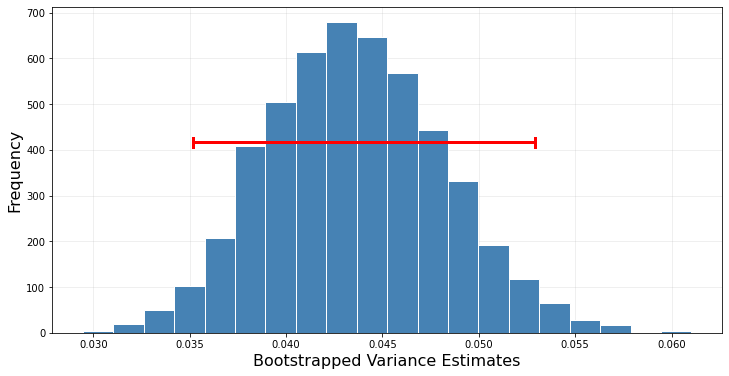

In [7]:
def bootstrapped_var(sample, num_boots=5000):

    # Create a list (or array-like object) of bootstrap resample variances
    list_of_variances = []
    for ii in range(num_boots):
        resample_var = np.random.choice(sample, size=len(sample), replace=True)
        boot_var = resample_var.var(ddof=1)
        list_of_variances.append(boot_var)
    
    # Compute the 2.5 and 97.5th percentiles of the list of bootstrapped variances
    L = np.percentile(list_of_variances, 2.5)
    U = np.percentile(list_of_variances, 97.5)

    # Your 95% confidence interval estimate is given by these percentiles
    CI = np.array([L, U])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_variances).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Variance Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    
    return CI 
    
bootstrapped_var(sample1)

**Part B**: Does your 95% bootstrapped confidence interval cover the true variance of the population? 

yes

### Exercise 3 - Empirical Coverage of Bootstrapped Confidence Intervals  
*** 

Complete the function CI_test below to test the coverage of the bootstrapped confidence intervals at the 95% confidence level for the mean of the population that $\texttt{sample}$ is drawn from.  Recall that you know that the true sample mean is $1/\lambda = 0.2$.  

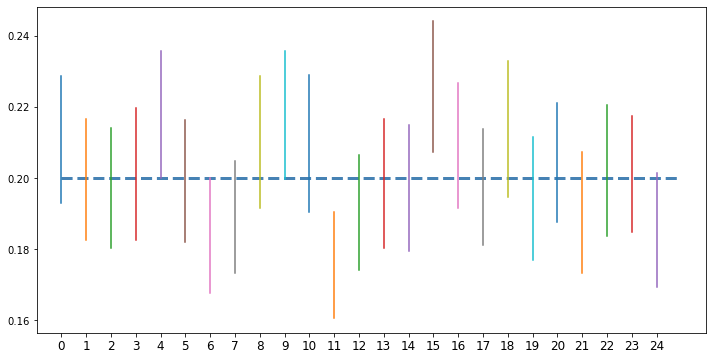

In [27]:
def CI_test(num_CIs=100, num_boots=5000):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    mean = 0.2
    
    ax.plot([0,num_CIs], [mean, mean], color="steelblue", ls='--', lw=3)
       # Horizontal line marking the mean
        
    for jj in range(num_CIs):
        sample = np.random.exponential(1/5, size=500)
        list_of_means = []
        for ii in range(num_boots):
            resample_mean = np.random.choice(sample, size=len(sample), replace=True)
            boot_mean = resample_mean.mean()
            list_of_means.append(boot_mean)
    
        # Compute the 2.5 and 97.5th percentiles of the list of bootstrapped variances
        L = np.percentile(list_of_means, 2.5)
        U = np.percentile(list_of_means, 97.5)

        # Your 95% confidence interval estimate is given by these percentiles
        CI = np.array([L, U])
        ax.plot([jj, jj], [L, U])
        
    ax.set_xlim([-1,num_CIs+1])
    plt.xticks(range(num_CIs), fontsize=12)
        
CI_test(num_CIs=25, num_boots=5000)
# Call the function

### Exercise 4 - Parametric Bootstrap for the Exponential Parameter 
*** 

In this exercise you will experiment with the parametric bootstrap technique to compute confidence intervals for various statistics of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Complete the function bootstrapped_lam below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped $\color{red}{\text{confidence interval for the exponential parameter}}$ $\color{red}\lambda$.  Recall from class that a good estimator for $\lambda$ is $1/x$ where $x$ is assumed to come from $Exp(\lambda)$. 

In [20]:

def bootstrapped_lam(sample, num_boots=5000):
    
    list_of_lams = []
    
    
    for i in range(0,num_boots):
        resample = np.random.exponential(1/5, size=500)
        resample_mean = resample.mean()
        lambda_resample = 1/resample_mean
        list_of_lams.append(lambda_resample)
        
    L = np.percentile(list_of_lams,2.5)
    U = np.percentile(list_of_lams,97.5)
    
    CI = [L, U]
    return CI 
    
#bootstrapped_lam(sample1)

bootstrapped_lam(xbar)

[4.596689680778052, 5.453545866691794]

**Part B**: Complete the function parametric_stdev below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$.  From each bootstrapped resample, $\color{red}{\text{estimate the exponential parameter}}$ $\lambda$, then $\color{blue}{\text{transform the estimate}}$ of $\lambda$ to the variance of the exponential distribution.  With your bootstrapped estimates of $\sigma$, compute a 95% confidence interval for the variance.  How does this confidence interval compared to the one computed in Exercise 2? 


In [10]:
def parametric_stdev(sample, num_boots=5000):
    
    list_of_sigs = []
    
    for i in range(0,num_boots):
        resample = np.random.exponential(1/5, size=500)
        #resample_mean = resample.mean()
        #lambda_resample = 1/resample_mean
        #sigma = 1/lambda_resample
        #boot_variance = sigma**2
        sigma = resample.std(ddof=1)
        boot_variance = sigma**2
        list_of_sigs.append(boot_variance)
        
    L = np.percentile(list_of_sigs,2.5)
    U = np.percentile(list_of_sigs,97.5)
    
    CI = [L, U]
    return CI 
    #return np.array([0,1]) # TODO, this is just a fill-value
    
parametric_stdev(sample1)

[0.03090192095806135, 0.050912580610485904]